In [36]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
from PIL import Image

In [2]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [3]:
from keras.preprocessing.image import load_img, img_to_array
from numpy import asarray
from PIL import Image
x = []
y = []
filenames = (os.listdir("C:\\Users\\Admin\\Downloads\\mask\\with_mask"))
for i in filenames:
    photo = load_img("C:\\Users\\Admin\\Downloads\\mask\\with_mask\\"+i,target_size=(400,400))
    photo = img_to_array(photo)
    x.append(photo)
    y.append(1) # 1 with mask
filenames = (os.listdir("C:\\Users\\Admin\\Downloads\\mask\\without_mask"))
for i in filenames:
    photo = load_img("C:\\Users\\Admin\\Downloads\\mask\\without_mask\\"+i,target_size=(400,400))
    photo = img_to_array(photo)
    x.append(photo)
    y.append(0) # 0 without mask
x = asarray(x)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\Admin\\Downloads\\mask\\with_mask'

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [55]:
print(x_train.shape, x_test.shape)

(3066, 400, 400, 3) (767, 400, 400, 3)


In [56]:
#convert dependent variable to categorical
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [57]:
#normalize data
x_train = x_train/255.0
x_test =  x_test/255.0

In [58]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.22))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

In [59]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [60]:
#train model with training set
model_train = model.fit(x_train, y_train, batch_size=64,epochs=4,verbose=1,validation_split=0.20)

Train on 2452 samples, validate on 614 samples
Epoch 1/4
2452/2452 [==============================] - ETA: 38:57 - loss: 0.6912 - accuracy: 0.523 - ETA: 23:28 - loss: 0.7698 - accuracy: 0.543 - ETA: 17:59 - loss: 0.7455 - accuracy: 0.526 - ETA: 15:06 - loss: 0.7361 - accuracy: 0.503 - ETA: 13:26 - loss: 0.7233 - accuracy: 0.521 - ETA: 12:09 - loss: 0.7126 - accuracy: 0.531 - ETA: 11:12 - loss: 0.7212 - accuracy: 0.520 - ETA: 10:23 - loss: 0.7165 - accuracy: 0.517 - ETA: 9:43 - loss: 0.7118 - accuracy: 0.524 - ETA: 9:07 - loss: 0.7088 - accuracy: 0.53 - ETA: 8:36 - loss: 0.7051 - accuracy: 0.56 - ETA: 8:07 - loss: 0.7005 - accuracy: 0.56 - ETA: 7:39 - loss: 0.6945 - accuracy: 0.56 - ETA: 7:14 - loss: 0.6866 - accuracy: 0.56 - ETA: 6:51 - loss: 0.6764 - accuracy: 0.58 - ETA: 6:29 - loss: 0.6671 - accuracy: 0.60 - ETA: 6:07 - loss: 0.6560 - accuracy: 0.61 - ETA: 5:47 - loss: 0.6415 - accuracy: 0.62 - ETA: 5:28 - loss: 0.6208 - accuracy: 0.64 - ETA: 5:09 - loss: 0.6061 - accuracy: 0.65 - E

In [3]:
import tensorflow as tf
from keras.models import load_model
model.save('maskdetection.h5')

In [37]:
import tensorflow as tf

from keras.models import load_model
model = load_model('maskdetection.h5')
img = image.load_img('C:\\Users\\Admin\\Downloads\\pp2.jpg',target_size=(400,400,3))
img = image.img_to_array(img)

img = img/255

In [32]:

proba = model.predict(img.reshape(1,400,400,3))


In [30]:
proba

array([[0.8814326, 0.1504844]], dtype=float32)

Text(0.5, 1.0, 'Predicted: Without Mask')

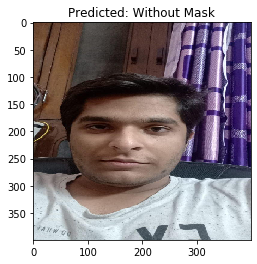

In [31]:
res = ["Without Mask","With Mask"]
plt.figure()
plt.imshow(img)
plt.title("Predicted: {}".format(res[np.argmax(proba)]))

In [50]:
import tensorflow as tf

from keras.models import load_model

model.save('maskdetection.h5')

In [15]:
import tensorflow as tf
from keras.models import load_model
model = load_model('maskdetection.h5')

In [3]:
import numpy as np
import cv2
face_cascade=cv2.CascadeClassifier('C:\\Users\\Admin\\Haarcascades\\haarcascade_frontalface_default.xml')

In [4]:
def face_extractor(img):
    faces=face_cascade.detectMultiScale(img,1.3,5)
    if faces is():
        return None
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x-100,y-100),(x+w+100,y+h+100),(0,255,255),2)
        cropped_face=img[y:y+h,x:x+w]
    return cropped_face



In [9]:
from keras.models import load_model
import cv2
import numpy as np

model = load_model('maskdetection.h5')
face_clsfr=cv2.CascadeClassifier('C:\\Users\\Admin\\Haarcascades\\haarcascade_frontalface_default.xml')

source=cv2.VideoCapture(0)

labels_dict={0:'without_mask',1:'with_mask'}
color_dict={0:(0,255,0),1:(0,0,255)}

while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(img,1.3,5)  

    for x,y,w,h in faces:
    
        face_img=img[y-h:y+2*h,x-w:x+2*w]
        resized=cv2.resize(face_img,(400,400))
        #normalized=resized/255.0
        #reshaped=np.reshape(normalized,(1,400,400,1))
        #result=model.predict(reshaped)
        
        img = image.img_to_array(resized)
        img = img/255
        result=model.predict(img.reshape(1,400,400,3))

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(
          img, labels_dict[label], 
          (x, y-10),
          cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()

KeyboardInterrupt: 

In [5]:
video_capture=cv2.VideoCapture(0)
while True:
    _,frame=video_capture.read()
    face=frame
    if type(face) is np.ndarray:
        face=cv2.resize(frame,(400,400))
        im=Image.fromarray(face,'RGB')
        #img_array=np.array(im)
        #img_array=np.expand_dims(img_array,axis=0)
        #pred=model.predict(img_array)
        #print(pred)
        img = image.img_to_array(im)
        img = img/255.0
        pred=model.predict(img.reshape(1,400,400,3))
        print(pred)
        res = ["Without Mask","With Mask"]
        #name="None matching"
        #name=format(res[np.argmin(pred)])
        if(pred[0][0]>pred[0][1]):
            name='without mask'
        else:
            name='with mask'
        cv2.putText(frame,name,(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
    else:
        cv2.putText(frame,"No face found",(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
    cv2.imshow('Video',frame)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()

[[0.15485112 0.8326533 ]]
[[0.14188704 0.8473931 ]]
[[0.15163796 0.83666414]]
[[0.15496059 0.83247846]]
[[0.15000512 0.8379959 ]]
[[0.15000512 0.8379959 ]]
[[0.15036725 0.8373753 ]]
[[0.14865717 0.83952194]]
[[0.15675536 0.8310834 ]]
[[0.14989495 0.8382266 ]]
[[0.14989495 0.8382266 ]]
[[0.1521064 0.8360025]]
[[0.15671785 0.83006495]]
[[0.15391743 0.8335086 ]]
[[0.16211212 0.8248711 ]]
[[0.16466731 0.82226497]]
[[0.16466731 0.82226497]]
[[0.16407984 0.8231261 ]]
[[0.15377405 0.8336716 ]]
[[0.15377405 0.8336716 ]]
[[0.16662043 0.81968683]]
[[0.156519   0.83051497]]
[[0.156519   0.83051497]]
[[0.1690754 0.8172411]]
[[0.15129267 0.8349786 ]]
[[0.13748038 0.85021955]]
[[0.13748038 0.85021955]]
[[0.14615113 0.8404203 ]]
[[0.1451762 0.842604 ]]
[[0.151086  0.8367198]]
[[0.151086  0.8367198]]
[[0.15116231 0.8366103 ]]
[[0.15307808 0.83502334]]
[[0.15094654 0.8375092 ]]
[[0.15094654 0.8375092 ]]
[[0.15573308 0.8318915 ]]
[[0.15801433 0.8293205 ]]
[[0.15801433 0.8293205 ]]
[[0.15783478 0.8293945

[[0.17310113 0.81329864]]
[[0.17068358 0.8159693 ]]
[[0.16946632 0.8172533 ]]
[[0.16946632 0.8172533 ]]
[[0.16799699 0.8189519 ]]
[[0.17166246 0.814982  ]]
[[0.17166246 0.814982  ]]
[[0.16917537 0.8174393 ]]


KeyboardInterrupt: 

In [ ]:
webcam = cv2.VideoCapture(0)
face_detector= cv2.CascadeClassifier('C:\\Users\\Admin\\Haarcascades\\haarcascade_frontalface_default.xml')

while True:
    successful_frame_read, frame= webcam.read()
    if not successful_frame_read:
        break
    #frame_grayscale= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = face_detector.detectMultiScale(frame_grayscale)
    smiles = smile_detector.detectMultiScale(frame_grayscale, scaleFactor=1.7, minNeighbors=20)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w,y+h), (100,200,50),4)
        
        the_face=frame[y:y+h, x:x+h]
        
        face_grayscale=cv2.cvtColor(the_face, cv2.COLOR_BGR2GRAY)
        
        smiles = smile_detector.detectMultiScale(face_grayscale, scaleFactor=1.7, minNeighbors=20)
        
#         for(x_, y_,w_,h_) in smiles:
#                 cv2.rectangle(the_face, (x_,y_), (x_+w_,y_+h_), (50,50,200),4)
        
        if len(smiles)>0:
            cv2.putText(frame, 'smiling', (x, y+h+40), fontScale=3,fontFace=cv2.FONT_HERSHEY_PLAIN, color=(255,255,255))
    
   
    
    cv2.imshow('Why so serious?', frame)
    cv2.waitKey(1)
webcam.release()
cv2.destroyAllWindows()

In [39]:
import cv2
face_detector= cv2.CascadeClassifier('C:\\Users\\Admin\\Haarcascades\\haarcascade_frontalface_default.xml')

video_capture=cv2.VideoCapture(0)
while True:
    _,frame=video_capture.read()
    face=frame
    if type(face) is np.ndarray:
        face = face_detector.detectMultiScale(frame)

#         face=cv2.resize(frame,(400,400))
#         im=Image.fromarray(face,'RGB')
        #img_array=np.array(im)
        #img_array=np.expand_dims(img_array,axis=0)
        #pred=model.predict(img_array)
        #print(pred)
        
        for (x,y,w,h) in face:
            cv2.rectangle(frame, (x,y), (x+w,y+h), (100,200,50),4)

            the_face=frame[y:y+h, x:x+h]

    #         face_grayscale=cv2.cvtColor(the_face, cv2.COLOR_BGR2GRAY)
            face1=cv2.resize(the_face,(400,400))
            im=Image.fromarray(face1,'RGB')

            img = image.img_to_array(im)
            img = img/255
            pred=model.predict(img.reshape(1,400,400,3))
            print(pred)
            res = ["Without Mask","With Mask"]
            #name="None matching"
            #name=format(res[np.argmin(pred)])
            if(pred[0][0]>pred[0][1]):
                name='without mask'
            else:
                name='with mask'
            cv2.putText(frame,name,(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
    else:
        cv2.putText(frame,"No face found",(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
    cv2.imshow('Video',frame)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()

[[0.02305777 0.97263485]]
[[0.02095247 0.97543836]]
[[0.02195555 0.9740795 ]]
[[0.02185685 0.97429186]]
[[0.02216312 0.9737814 ]]
[[0.02279434 0.9730017 ]]
[[0.01997374 0.97688144]]
[[0.02228113 0.97381616]]
[[0.0213766  0.97514945]]
[[0.02272574 0.9734633 ]]
[[0.02173144 0.9746286 ]]
[[0.02160757 0.97454095]]
[[0.02221291 0.9739585 ]]
[[0.02196113 0.97430634]]
[[0.02149569 0.9748532 ]]
[[0.0220651 0.9738898]]
[[0.02141723 0.9748946 ]]
[[0.02248081 0.97351474]]
[[0.02239158 0.9737811 ]]
[[0.02168306 0.97455513]]
[[0.02170557 0.97461617]]
[[0.02091897 0.9755288 ]]
[[0.02080168 0.97567517]]
[[0.02057371 0.9757924 ]]
[[0.01986106 0.97682786]]
[[0.02126157 0.9750151 ]]
[[0.02217899 0.974144  ]]
[[0.01870829 0.9789356 ]]
[[0.01817557 0.97994256]]
[[0.01695805 0.98148465]]
[[0.01727559 0.98110193]]
[[0.01724145 0.9813907 ]]
[[0.01767848 0.98096895]]
[[0.01657865 0.9821568 ]]
[[0.01715763 0.98127925]]
[[0.01617755 0.9825928 ]]
[[0.01255628 0.9866215 ]]
[[0.01257336 0.9872034 ]]
[[0.01251235 0

KeyboardInterrupt: 